## Importing the necessary Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [278]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import math
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

## Reading Input Data and Review 

In [181]:
bankData = pd.read_csv('bank-full.csv')

# Printing Top-10 Observations from the Data set
bankData.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

**Insights:**
1. Target is the dependent variable and all the remaining 16 columns form independent variables
2. Most of the independent variable columns are categorical (non-numeric) and Descriptive dataset therefore is expected to provide less useful information

##  Exploratory data quality report

### 1. Univariate Analysis 

a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.


In [182]:
# Detailed Summary of Dataset
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Insights:**
1. There are 45211 rows and 17 columns in the dataset
2. Datatype of each column is as depicted in the Dtype column
3. Total non-null values equal to the number of rows which means there are null values in the dataset
4. Most of the columns are 'object' data-type which are actually of type 'category'. We need to convert the data-type from 'object' to 'category'

In [183]:
# Coverting object data-type to category
bankData['job']      =bankData.job.astype('category')
bankData['marital']  =bankData.marital.astype('category')
bankData['education']=bankData.education.astype('category')
bankData['default']  =bankData.default.astype('category')
bankData['housing']  =bankData.housing.astype('category')
bankData['loan']     =bankData.loan.astype('category')
bankData['contact']  =bankData.contact.astype('category')
bankData['month']    =bankData.month.astype('category')
bankData['poutcome'] =bankData.poutcome.astype('category')
bankData['Target']   =bankData.Target.astype('category')
#Check DataTypes
bankData.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [184]:
# 5-Point Descriptive Statistical Analysis of the Dataset
bankData.describe().T

count     mean      std       min    25%    50%      75%  \
age      45,211.00    40.94    10.62     18.00  33.00  39.00    48.00   
balance  45,211.00 1,362.27 3,044.77 -8,019.00  72.00 448.00 1,428.00   
day      45,211.00    15.81     8.32      1.00   8.00  16.00    21.00   
duration 45,211.00   258.16   257.53      0.00 103.00 180.00   319.00   
campaign 45,211.00     2.76     3.10      1.00   1.00   2.00     3.00   
pdays    45,211.00    40.20   100.13     -1.00  -1.00  -1.00    -1.00   
previous 45,211.00     0.58     2.30      0.00   0.00   0.00     0.00   

                max  
age           95.00  
balance  102,127.00  
day           31.00  
duration   4,918.00  
campaign      63.00  
pdays        871.00  
previous     275.00

**Insights:**
1. Average age of customers is around 41 yrs with a minimum of 18yrs and a maximum of 95. This sounds about right given that there are no unrealistic age groups who can have bank accounts
2. The average bank account balance is $1,362.27 with a wide standard-deviation of 3,044. Balance therefore seems to be heavily distributed across the dataset

### 1.1 Univariate Analysis on Age

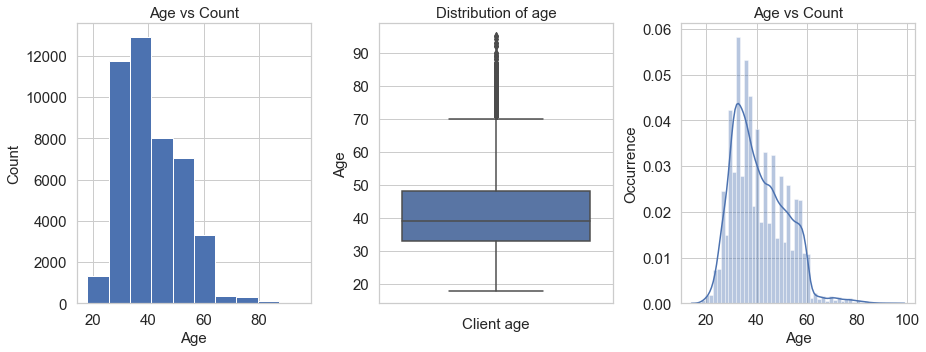

In [185]:
# Define subplots with 1-row and 3-columns
fig, (agx1,agx2,agx3)=plt.subplots(1,3,figsize=(13,5))

# Histogram on Age Parameter
agx1.hist(bankData['age'])
agx1.set_xlabel('Age', fontsize=15)
agx1.set_ylabel('Count', fontsize=15)
agx1.set_title('Age vs Count', fontsize=15)
agx1.tick_params(labelsize=15)

# Boxplot on Age Parameter
sns.boxplot(x='age',data=bankData,orient='v',ax=agx2)
agx2.set_xlabel('Client age', fontsize=15)
agx2.set_ylabel('Age', fontsize=15)
agx2.set_title('Distribution of age', fontsize=15)
agx2.tick_params(labelsize=15)


# Distribution Plot on Age Parameter
sns.distplot(bankData['age'],ax=agx3)
agx3.set_xlabel('Age', fontsize=15)
agx3.set_ylabel('Occurrence', fontsize=15)
agx3.set_title('Age vs Count', fontsize=15)
agx3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Insights On Customer Age Groups:**
1. Customer Age does cover all possible values ranging from 18 to 95
2. Most of the customers of ages >20 and <60 and therefore the data is right-skewed.

### 1.2 Univariate Analysis on Job 


Types of Jobs and their respective counts:

 job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64


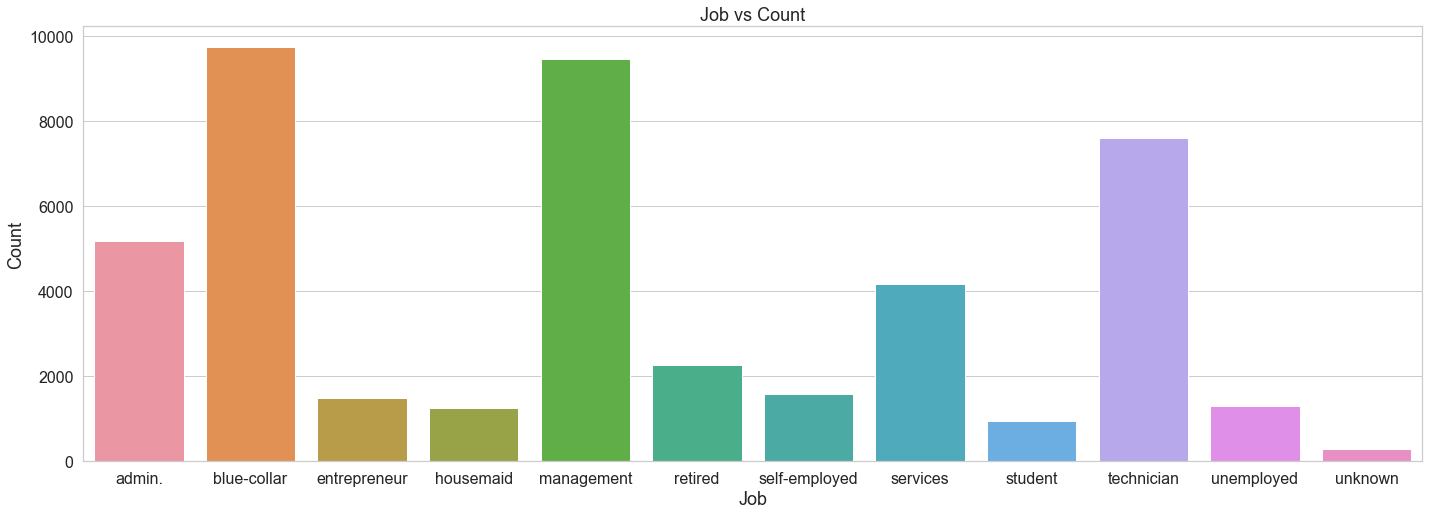

In [186]:
print('\nTypes of Jobs and their respective counts:\n\n',bankData.groupby('job').size())

# Countplot analysis of the jobs
fig, ajx=plt.subplots()
fig.set_size_inches(24,8)
sns.countplot(bankData['job'],data=bankData)
ajx.set_xlabel('Job', fontsize=18)
ajx.set_ylabel('Count', fontsize=18)
ajx.set_title('Job vs Count', fontsize=18)
ajx.tick_params(labelsize=16)


In [187]:
# Group the job categories which are similar 
# Merging all worker-type jobs
#bankData['job']=np.where(bankData['job']=='blue-collar','worker',bankData['job'])
#bankData['job']=np.where(bankData['job']=='housemaid','worker',bankData['job'])
# Merging all managerial-type jobs
#bankData['job']=np.where(bankData['job']=='services','managerial',bankData['job'])
#bankData['job']=np.where(bankData['job']=='admin','managerial',bankData['job'])
#bankData['job']=np.where(bankData['job']=='enterpreneur','managerial',bankData['job'])
#bankData['job']=np.where(bankData['job']=='management','managerial',bankData['job'])
#
#print('\nUnique Job Catrgories After Merging Similar Job Types:\n\n',bankData.groupby('job').size())

**Insights On Customer Job Types:**
1. There are some customers whose job roles are unknown
2. Top customer base is from the job categories - blue-collar, Management & Technician

### 1.3 Univariate Analysis on Education 


 Type of Education Categories and their Count:

 education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64


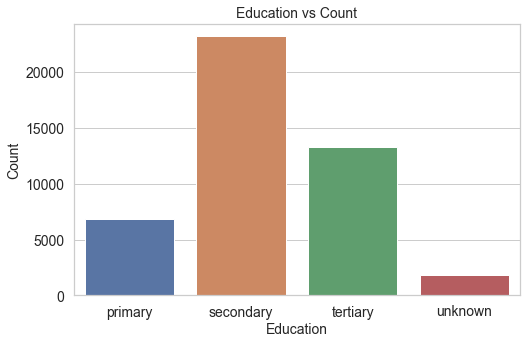

In [188]:
print('\n Type of Education Categories and their Count:\n\n',bankData.groupby('education').size())
# Countplot analysis of the education
fig, aedx=plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(bankData['education'],data=bankData)
aedx.set_xlabel('Education', fontsize=14)
aedx.set_ylabel('Count', fontsize=14)
aedx.set_title('Education vs Count', fontsize=14)
aedx.tick_params(labelsize=14)

**Insights on Customer Education:**
1. Most of the customers have Secondary & Tertiary types of Education
2. Secondary Educated Customers are at the top of the list

### 1.4 Univariate Analysis on Marital Status 


Marital Status of the Customers and Count:

 marital
divorced     5207
married     27214
single      12790
dtype: int64


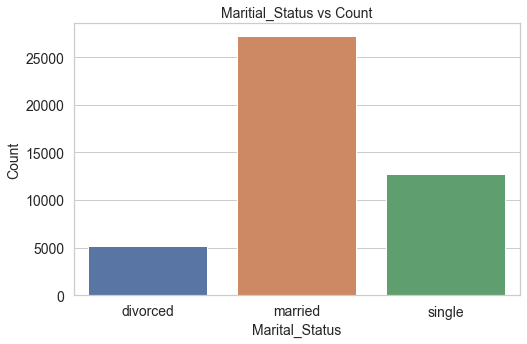

In [189]:
print('\nMarital Status of the Customers and Count:\n\n',bankData.groupby('marital').size())
# Countplot analysis of the marital Status
fig, amx=plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(bankData['marital'],data=bankData)
amx.set_xlabel('Marital_Status', fontsize=14)
amx.set_ylabel('Count', fontsize=14)
amx.set_title('Maritial_Status vs Count', fontsize=14)
amx.tick_params(labelsize=14)

**Insights on Customer Marital Status:**

1. More than half of the customers are married

### 1.5 Univariate Analysis on Credit Default, Housing Loan and Personal Loans


 Number of Customers with Default Credit:

 default
no     44396
yes      815
dtype: int64

 Number of Customers with Housing Loan:

 housing
no     20081
yes    25130
dtype: int64

 Number of Customers with Personal Loan:

 loan
no     37967
yes     7244
dtype: int64


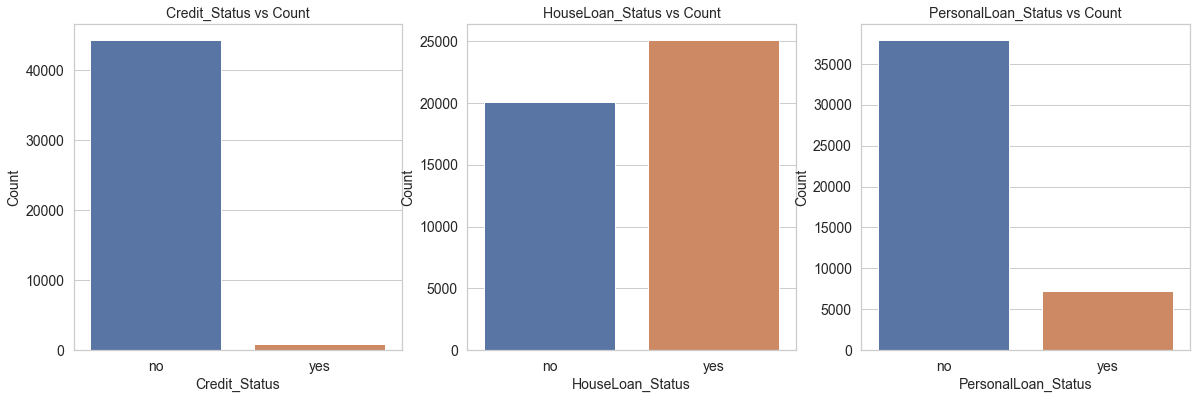

In [190]:
print('\n Number of Customers with Default Credit:\n\n', bankData.groupby('default').size())
print('\n Number of Customers with Housing Loan:\n\n', bankData.groupby('housing').size())
print('\n Number of Customers with Personal Loan:\n\n', bankData.groupby('loan').size())

# Define subplots with 1-row and 3-columns
fig, (alx1,alx2,alx3)=plt.subplots(1,3,figsize=(13,5))
fig.set_size_inches(20,6)

# Countplot analysis of the Credit Default Status
sns.countplot(bankData['default'],data=bankData,ax=alx1)
alx1.set_xlabel('Credit_Status', fontsize=14)
alx1.set_ylabel('Count', fontsize=14)
alx1.set_title('Credit_Status vs Count', fontsize=14)
alx1.tick_params(labelsize=14)

# Countplot analysis of the HouseLoan Status
sns.countplot(bankData['housing'],data=bankData,ax=alx2)
alx2.set_xlabel('HouseLoan_Status', fontsize=14)
alx2.set_ylabel('Count', fontsize=14)
alx2.set_title('HouseLoan_Status vs Count', fontsize=14)
alx2.tick_params(labelsize=14)

# Countplot analysis of the Personal Loan Status
sns.countplot(bankData['loan'],data=bankData,ax=alx3)
alx3.set_xlabel('PersonalLoan_Status', fontsize=14)
alx3.set_ylabel('Count', fontsize=14)
alx3.set_title('PersonalLoan_Status vs Count', fontsize=14)
alx3.tick_params(labelsize=14)



**Insights on Customer Credit, HouseLoan and Personal Loan Status:**
1. Maximum customers do not have their credit in default which means they are good customers to target
2. Split between customers having Housing Loan is almost equally split therefore this parameter cannot be used as a differentiator
3. Maximum number of customers do not have a Personal Loan which therefore enables them to accept the Term Deposit offer

### 1.6 Univariate Analysis on Bank Balance 


 Statistical Analysis of the Bank Balance of Customers:

 count    45,211.00
mean      1,362.27
std       3,044.77
min      -8,019.00
25%          72.00
50%         448.00
75%       1,428.00
max     102,127.00
Name: balance, dtype: float64


 Outliers Calculation on Bank Balance:

1st Quartile, Q1 Value:  72.0
3rd Quartile, Q3 Value:  1428.0
Inter-Quartile Range (IQR):  1356.0
Lower Outliers:  -1962.0
Upper Outliers:  3462.0

Percentage of Customers with Balance > $1000 :  32.0 %
Percentage of Customers with Balance < $0:  8.0 %


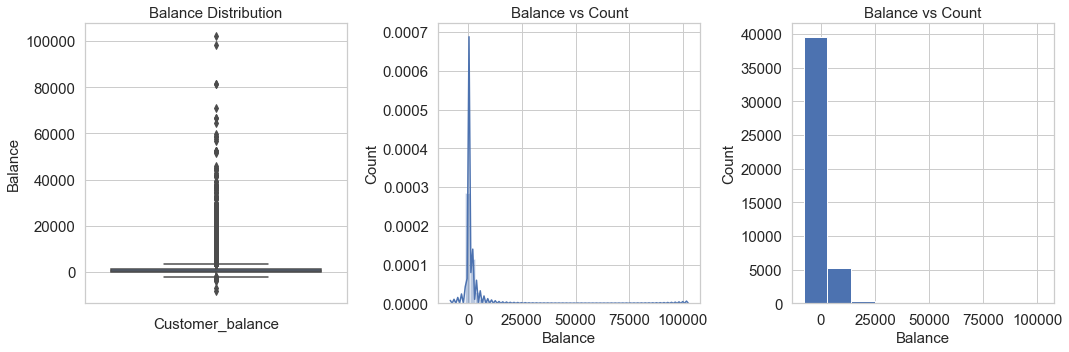

In [191]:
print('\n Statistical Analysis of the Bank Balance of Customers:\n\n', bankData['balance'].describe())
print('\n\n Outliers Calculation on Bank Balance:')
Q1=bankData['balance'].quantile(q=0.25)
Q3=bankData['balance'].quantile(q=0.75)
IQR=Q3-Q1
print('\n1st Quartile, Q1 Value: ',Q1)
print('3rd Quartile, Q3 Value: ',Q3)
print('Inter-Quartile Range (IQR): ',IQR)
print('Lower Outliers: ',Q1-1.5*IQR)
print('Upper Outliers: ',Q3+1.5*IQR)
print('\nPercentage of Customers with Balance > $1000 : ',round(bankData[bankData['balance']>1000]['balance'].count()*100/len(bankData)), '%')
print('Percentage of Customers with Balance < $0: ',round(bankData[bankData['balance']<0]['balance'].count()*100/len(bankData)), '%')

## Plot Bank Balance
fig, (abx1,abx2,abx3)=plt.subplots(1,3,figsize=(15,5))
#boxplot
sns.boxplot(x='balance',data=bankData,orient='v',ax=abx1)
abx1.set_xlabel('Customer_balance', fontsize=15)
abx1.set_ylabel('Balance', fontsize=15)
abx1.set_title('Balance Distribution', fontsize=15)
abx1.tick_params(labelsize=15)

#distplot
sns.distplot(bankData['balance'],ax=abx2)
abx2.set_xlabel('Balance', fontsize=15)
abx2.set_ylabel('Count', fontsize=15)
abx2.set_title('Balance vs Count', fontsize=15)
abx2.tick_params(labelsize=15)

#histogram
abx3.hist(bankData['balance'])
abx3.set_xlabel('Balance', fontsize=15)
abx3.set_ylabel('Count', fontsize=15)
abx3.set_title('Balance vs Count', fontsize=15)
abx3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Insights on Customer Bank Balance:**
1. There are no null-values in the 'balance' column of the dataset
2. If we can consider \$1000 as a minimum balance of a potential customer then 32\% of customers qualify.
3. If we can consider customers with $0 balance is very unlikely to open Term Deposit then we can filter out 8% os the customers
4. For Balance column, Mean and Median not equal indicating skewness in the data. In this case, the data is right-skewed

### 1.6 Univariate Analysis on Contact Type 

Type of Customer Contact:
 contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64


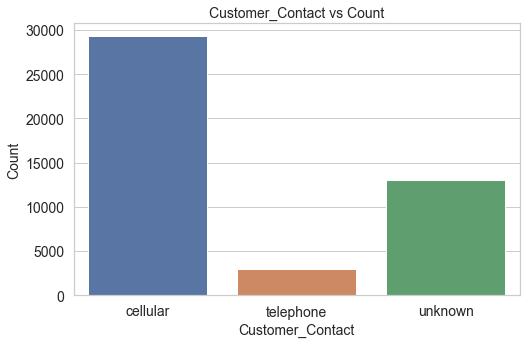

In [192]:
print('Type of Customer Contact:\n', bankData.groupby('contact').size())

# Countplot analysis of the Customer Contact Type
fig, amx=plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(bankData['contact'],data=bankData)
amx.set_xlabel('Customer_Contact', fontsize=14)
amx.set_ylabel('Count', fontsize=14)
amx.set_title('Customer_Contact vs Count', fontsize=14)
amx.tick_params(labelsize=14)

**Insights on Customer Contact Type:**
1. Maximum Number of customers have a cellular contact number. This can enable both voice and text modes of communication
2. Significant number of customers donot have any form of contact for whom data still needs to be gathered

### 1.7 Univariate Analysis on Day,Month 

Count values in Day: 
 loan
no     37967
yes     7244
dtype: int64
Count values in Month: 
 loan
no     37967
yes     7244
dtype: int64


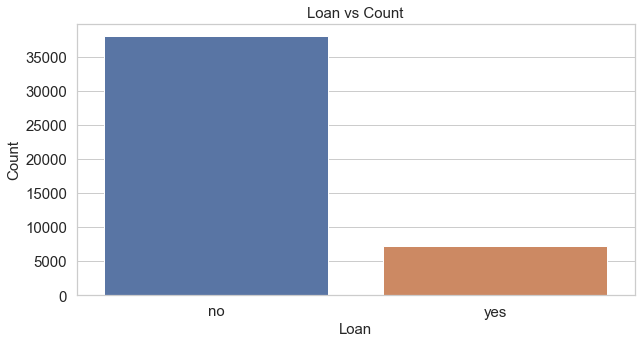

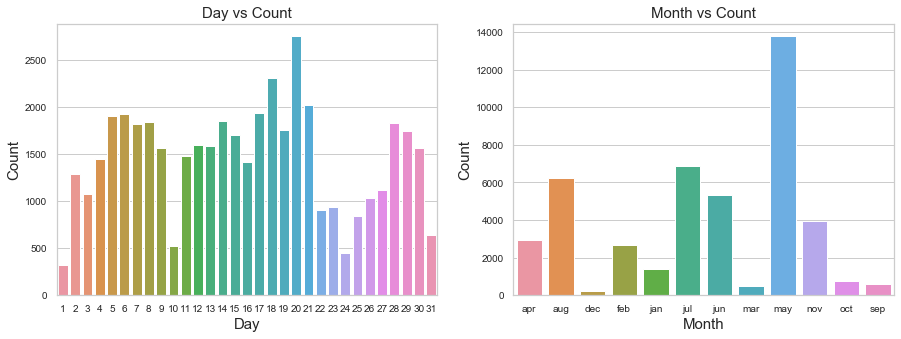

In [193]:
print('Count values in Day: \n',bankData.groupby('loan').size())
print('Count values in Month: \n', bankData.groupby('loan').size())
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bankData['loan'],data=bankData)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#countplot
sns.countplot(bankData['day'],data=bankData,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Day vs Count', fontsize=15)
ax1.tick_params(labelsize=10)

#distplot
sns.countplot(bankData['month'],data=bankData,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Month vs Count', fontsize=15)
ax2.tick_params(labelsize=10)

**Insights on Day,Month Columns:**

1. Maximum Number of customers were contacted during Summer, between May and August. 
2. Customers have been contacted across all the days of the month with almost same call volume

### 1.8 Univariate Analysis on Call Duration 


 Statistical Analysis of the Call Duration of Customers:

 count   45,211.00
mean       258.16
std        257.53
min          0.00
25%        103.00
50%        180.00
75%        319.00
max      4,918.00
Name: duration, dtype: float64


 Outliers Calculation on Call Duration:

1st Quartile, Q1 Value:  103.0
3rd Quartile, Q3 Value:  319.0
Inter-Quartile Range (IQR):  216.0
Lower Outliers:  -221.0
Upper Outliers:  643.0

Percentage of Outliers in Duration Upper :  7.0 %
Percentage of Outliers in Duration Upper :  0.0 %


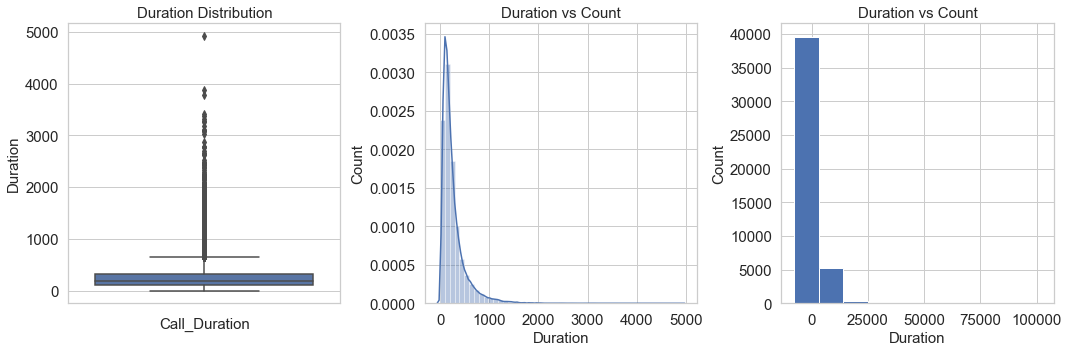

In [194]:
print('\n Statistical Analysis of the Call Duration of Customers:\n\n', bankData['duration'].describe())
print('\n\n Outliers Calculation on Call Duration:')
dur_Q1=bankData['duration'].quantile(q=0.25)
dur_Q3=bankData['duration'].quantile(q=0.75)
dur_IQR=dur_Q3-dur_Q1
print('\n1st Quartile, Q1 Value: ',dur_Q1)
print('3rd Quartile, Q3 Value: ',dur_Q3)
print('Inter-Quartile Range (IQR): ',dur_IQR)
dur_LowOutliers = dur_Q1-1.5*dur_IQR
dur_UpOutliers  = dur_Q3+1.5*dur_IQR
print('Lower Outliers: ',dur_LowOutliers)
print('Upper Outliers: ',dur_UpOutliers)
print('\nPercentage of Outliers in Duration Upper : ',round(bankData[bankData['duration']>dur_UpOutliers]['duration'].count()*100/len(bankData)), '%')
print('Percentage of Outliers in Duration Upper : ',round(bankData[bankData['duration']<dur_LowOutliers]['duration'].count()*100/len(bankData)), '%')

## Plot Bank Balance
fig, (adx1,adx2,adx3)=plt.subplots(1,3,figsize=(15,5))
#boxplot
sns.boxplot(x='duration',data=bankData,orient='v',ax=adx1)
adx1.set_xlabel('Call_Duration', fontsize=15)
adx1.set_ylabel('Duration', fontsize=15)
adx1.set_title('Duration Distribution', fontsize=15)
adx1.tick_params(labelsize=15)

#distplot
sns.distplot(bankData['duration'],ax=adx2)
adx2.set_xlabel('Duration', fontsize=15)
adx2.set_ylabel('Count', fontsize=15)
adx2.set_title('Duration vs Count', fontsize=15)
adx2.tick_params(labelsize=15)

#histogram
adx3.hist(bankData['balance'])
adx3.set_xlabel('Duration', fontsize=15)
adx3.set_ylabel('Count', fontsize=15)
adx3.set_title('Duration vs Count', fontsize=15)
adx3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### 1.9 Univariate Analysis of Previous Marketing Outcome (poutcome)


Previous Marketing Outcome Count:

 poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


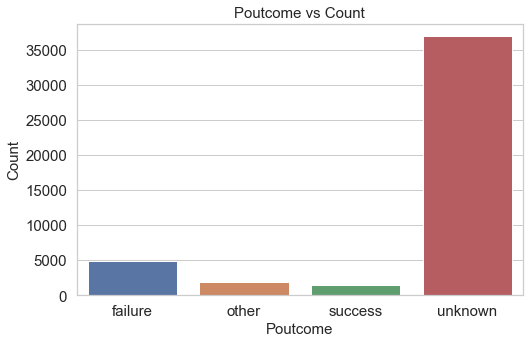

In [195]:
print('\nPrevious Marketing Outcome Count:\n\n',bankData.groupby('poutcome').size())
fig, apx=plt.subplots()
fig.set_size_inches(8,5)

#countplot
sns.countplot(bankData['poutcome'],data=bankData)
apx.set_xlabel('Poutcome', fontsize=15)
apx.set_ylabel('Count', fontsize=15)
apx.set_title('Poutcome vs Count', fontsize=15)
apx.tick_params(labelsize=15)

### 1.10 Univariate Analysis on Dependent Variable (Target) 


Dependent Variable Target Count:

 Target
no     39922
yes     5289
dtype: int64


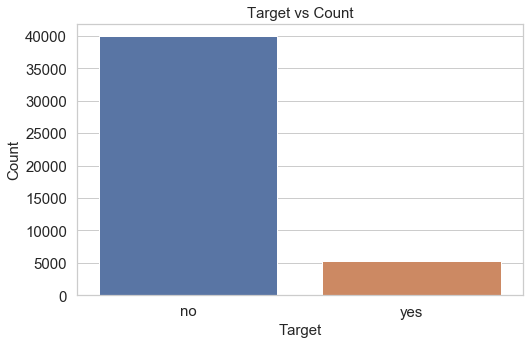

In [196]:
print('\nDependent Variable Target Count:\n\n',bankData.groupby('Target').size())
fig, apx=plt.subplots()
fig.set_size_inches(8,5)

#countplot
sns.countplot(bankData['Target'],data=bankData)
apx.set_xlabel('Target', fontsize=15)
apx.set_ylabel('Count', fontsize=15)
apx.set_title('Target vs Count', fontsize=15)
apx.tick_params(labelsize=15)

### 1.11 Encode Categorical Variables 

In [197]:
# Use Labelencoder to encode categorical varaibles with numerical values
lbencode=LabelEncoder()
bankData['job']       =lbencode.fit_transform(bankData['job'])
bankData['marital']   =lbencode.fit_transform(bankData['marital'])
bankData['education'] =lbencode.fit_transform(bankData['education'])
bankData['default']   =lbencode.fit_transform(bankData['default'])
bankData['housing']   =lbencode.fit_transform(bankData['housing'])
bankData['loan']      =lbencode.fit_transform(bankData['loan'])
bankData['contact']   =lbencode.fit_transform(bankData['contact']) 
bankData['month']     =lbencode.fit_transform(bankData['month']) 
bankData['poutcome']  =lbencode.fit_transform(bankData['poutcome'])
bankData['Target']    =lbencode.fit_transform(bankData['Target'])
bankData.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1     -1         0         3       0  
1    5      8       151         1     -1         0         3       0  
2    5      8        76         1     -1         0         3       0  
3    5      8        92         1     -1         0         3       0  
4    5      8       198         1     -1         0         3       0

In [198]:
bankData.describe().T

count     mean      std       min    25%    50%      75%  \
age       45,211.00    40.94    10.62     18.00  33.00  39.00    48.00   
job       45,211.00     4.34     3.27      0.00   1.00   4.00     7.00   
marital   45,211.00     1.17     0.61      0.00   1.00   1.00     2.00   
education 45,211.00     1.22     0.75      0.00   1.00   1.00     2.00   
default   45,211.00     0.02     0.13      0.00   0.00   0.00     0.00   
balance   45,211.00 1,362.27 3,044.77 -8,019.00  72.00 448.00 1,428.00   
housing   45,211.00     0.56     0.50      0.00   0.00   1.00     1.00   
loan      45,211.00     0.16     0.37      0.00   0.00   0.00     0.00   
contact   45,211.00     0.64     0.90      0.00   0.00   0.00     2.00   
day       45,211.00    15.81     8.32      1.00   8.00  16.00    21.00   
month     45,211.00     5.52     3.01      0.00   3.00   6.00     8.00   
duration  45,211.00   258.16   257.53      0.00 103.00 180.00   319.00   
campaign  45,211.00     2.76     3.10      1.00   1.00   2.00     3.00   
pdays     45,211.00    40.20   100.13     -1.00  -1.00  -1.00    -1.00   
previous  45,211.00     0.58     2.30      0.00   0.00   0.00     0.00   
poutcome  45,211.00     2.56     0.99      0.00   3.00   3.00     3.00   
Target    45,211.00     0.12     0.32      0.00   0.00   0.00     0.00   

                 max  
age            95.00  
job            11.00  
marital         2.00  
education       3.00  
default         1.00  
balance   102,127.00  
housing         1.00  
loan            1.00  
contact         2.00  
day            31.00  
month          11.00  
duration    4,918.00  
campaign       63.00  
pdays         871.00  
previous      275.00  
poutcome        3.00  
Target          1.00

## 2. Multi-Variate Analysis 


 Corellation Matrix Using HeatMap



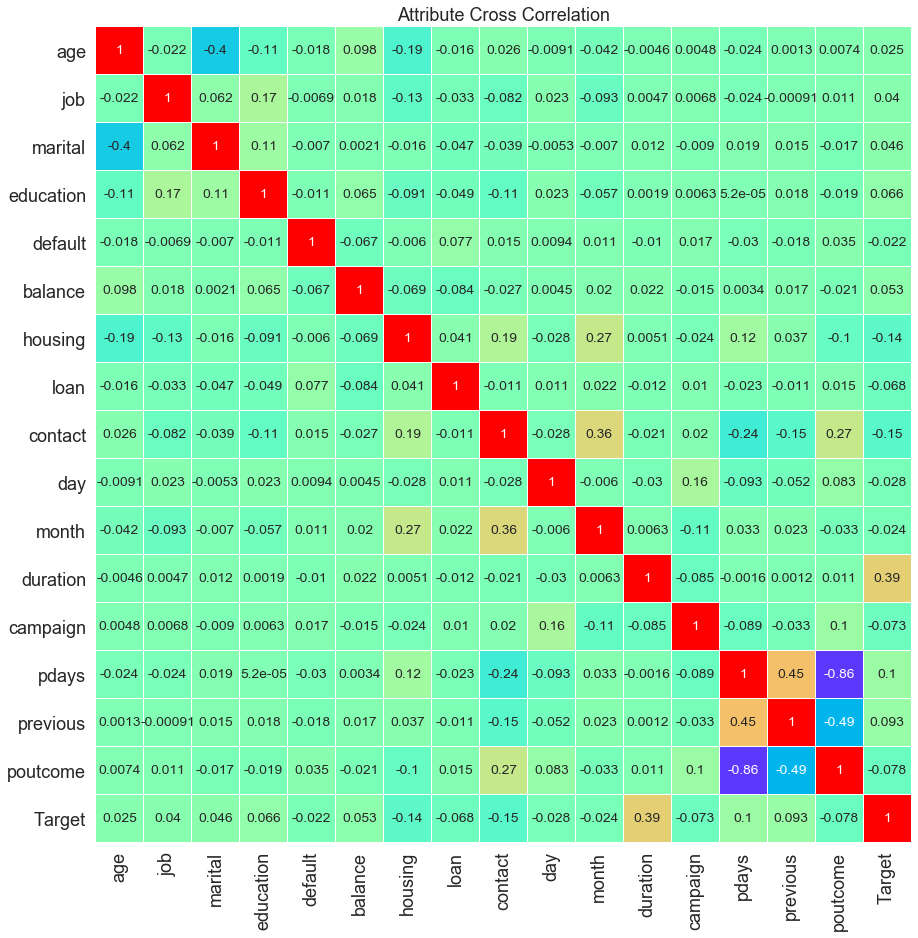

In [199]:
print('\n Corellation Matrix Using HeatMap\n')
dataCorr = bankData.corr()
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(dataCorr,annot=True,cmap='rainbow',linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Attribute Cross Correlation',fontsize=18)
ax.tick_params(labelsize=18)

**Insights from Cross-Correlation HeatMap:**
1. Attributes - marital, education, balance, duration, pdays and previous are mildly correlated to the dependent Target variable
2. Age, poutcome, loan and day/month seem to have no correlation to Target

In [200]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

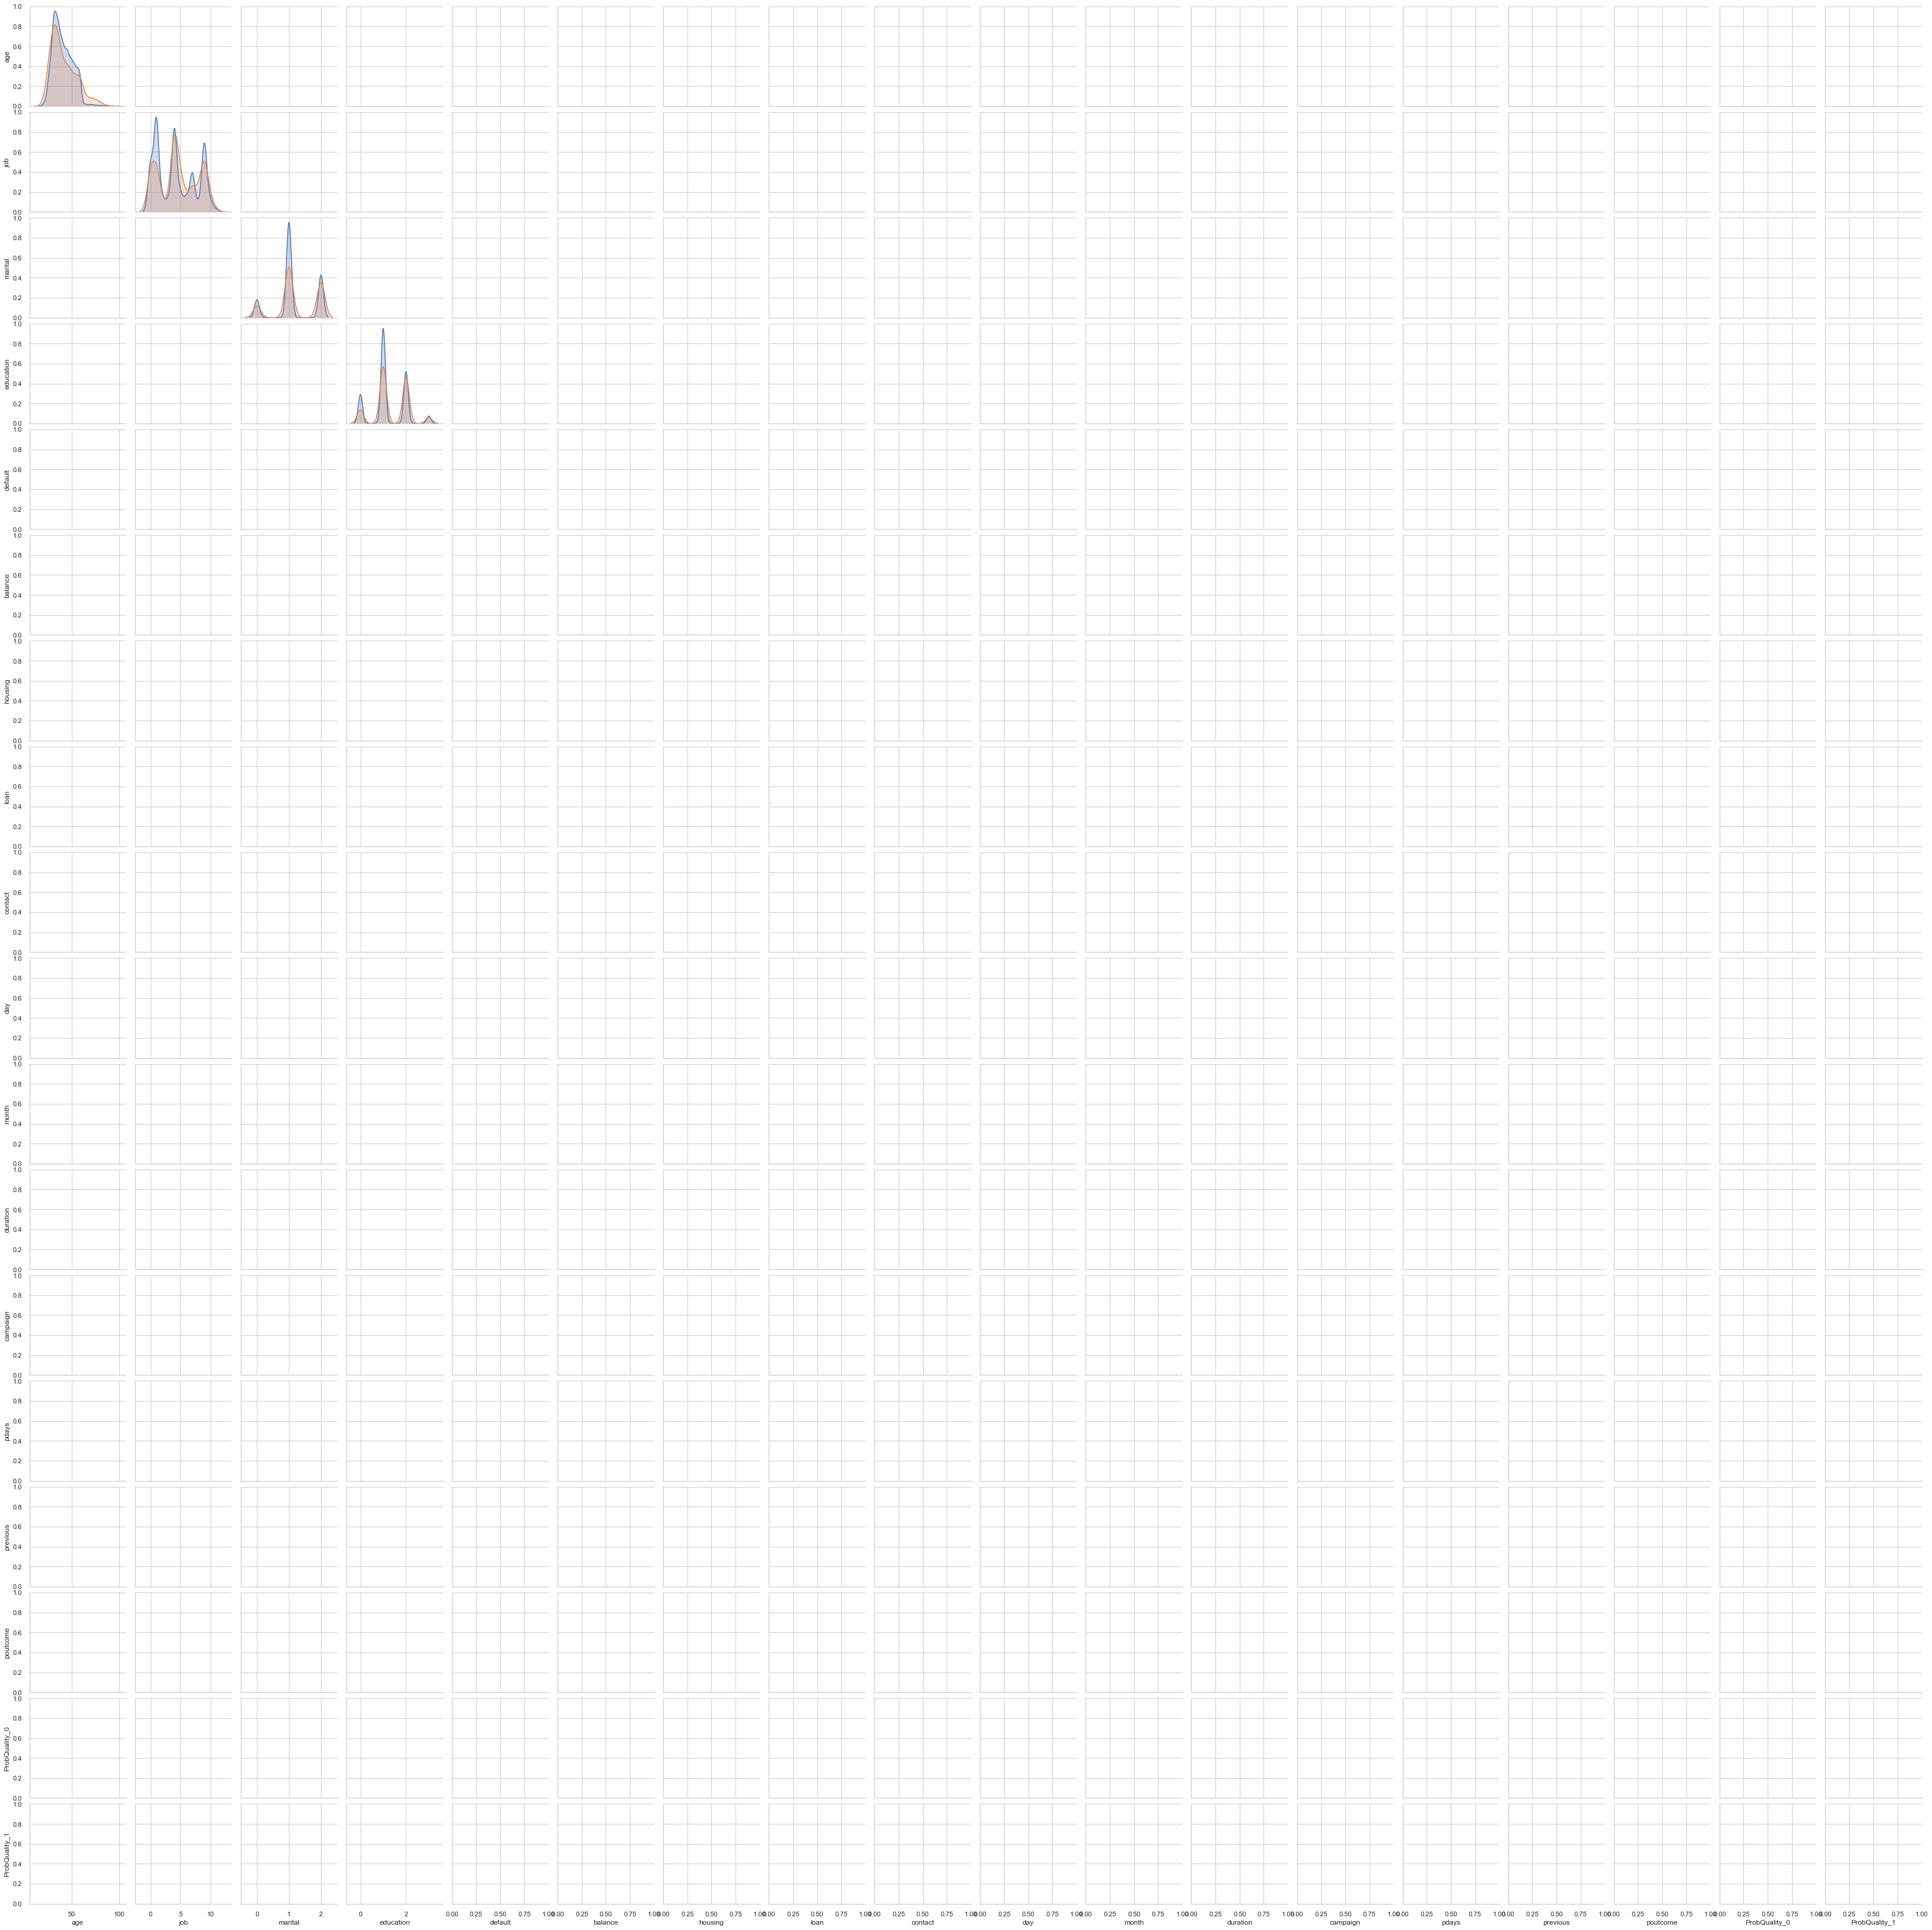

In [276]:
sns.pairplot(bankData, hue='Target')

In [ ]:
bankData.dtypes
bankData2=pd.read_csv('bank-full.csv')
#bankData2.info()
bankData3=bankData.copy()
bankData3['Target']=bankData3['Target'].astype('category') 
bankData3['job']=bankData3['job'].astype('category') 
bankData3['marital']=bankData3['marital'].astype('category') 
bankData3['education']=bankData3['education'].astype('category') 
bankData3['default']=bankData3['default'].astype('category') 
bankData3['housing']=bankData3['housing'].astype('category') 
bankData3['loan']=bankData3['loan'].astype('category') 
bankData3['contact']=bankData3['contact'].astype('category') 
bankData3['month']=bankData3['month'].astype('category') 
bankData3['poutcome']=bankData3['poutcome'].astype('category') 
bankData3.info()


In [137]:
# Let us look at the target column which is 'Target' to understand how the data is distributed amongst the various values
bankData.groupby(["Target"]).mean()

age  balance   day  duration  campaign  pdays  previous
Target                                                          
no     40.84 1,303.71 15.89    221.18      2.85  36.42      0.50
yes    41.67 1,804.27 15.16    537.29      2.14  68.70      1.17

In [138]:
bankData.groupby(["Target"]).median()

age  balance  day  duration  campaign  pdays  previous
Target                                                        
no       39      417   16       164         2     -1         0
yes      38      733   15       426         2     -1         0

In [142]:
pd.crosstab(bankData['education'],bankData['Target'],normalize='columns')

Target      no  yes
education          
primary   0.16 0.11
secondary 0.52 0.46
tertiary  0.28 0.38
unknown   0.04 0.05

In [145]:
pd.crosstab(bankData['loan'],bankData['Target'],normalize='index')

Target   no  yes
loan            
no     0.87 0.13
yes    0.93 0.07

In [149]:
df.groupby(['Target','education'])['marital'].value_counts()

Target  education  marital 
no      primary    married      4850
                   single        762
                   divorced      648
        secondary  married     12466
                   single       5762
                   divorced     2524
        tertiary   married      6125
                   single       3912
                   divorced     1268
        unknown    married      1018
                   single        442
                   divorced      145
yes     primary    married       396
                   divorced      104
                   single         91
        secondary  married      1304
                   single        855
                   divorced      291
        tertiary   married       913
                   single        880
                   divorced      203
        unknown    married       142
                   single         86
                   divorced       24
Name: marital, dtype: int64

**Insights w.r.t education:**
1. secondary and tertiary education cateogry and who are married are more likely to accept Term Deposit
2. age seems to have no correlation to Target variable

### Analysis of Continous attributes ( Age, balance) vs Categorical attribute (Target)

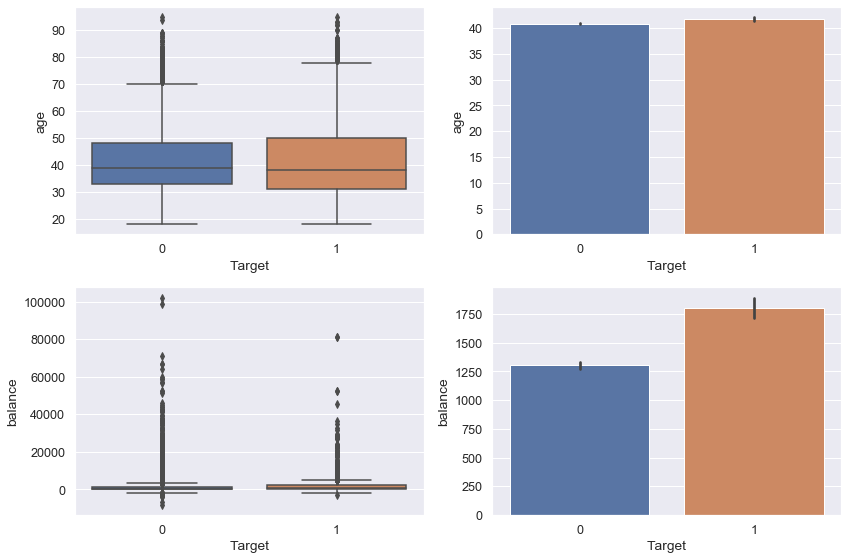

In [202]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
# Categorical vs Continuous ----Target vs Age
#boxplot and barplot
sns.boxplot(x="Target", y="age", data=bankData,ax=ax[0][0])
sns.barplot(x="Target", y="age", data=bankData,ax=ax[0][1])


# Categorical vs Continuous ----Target vs balance
#boxplot and barplot
sns.boxplot(x="Target", y="balance", data=bankData,ax=ax[1][0])
sns.barplot(x="Target", y="balance", data=bankData,ax=ax[1][1])

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Data Preparation For Model Building 

In [204]:
#Splitting the data into Training and Testing
#independent and dependent variables
#X=bankData.loc[:,bankData.columns!='Target']
#y=bankData.loc[:,bankData.columns=='Target']

# Split X and y into training and test set in 70:30 ratio
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
#columns=X_train.columns

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in bankData3.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(bankData[features], bankData['Target'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 16), (13564, 16))

## Decision Tree Model 

In [205]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

bankData_entropy = DecisionTreeClassifier(criterion='entropy')
bankData_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Decision Tree Model: Accuracy of the Model and Confusion Matrix 

In [206]:
print("Train: %.2f" % bankData_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % bankData_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


#### Descision Tree Model: Pruning

In [230]:
bankDataDT_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
bankDataDT_pruned.fit(X_train, y_train)
print("Train: %.2f" % bankDataDT_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % bankDataDT_pruned.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


#### Descision Tree Model: Tree Visualization 

y_train Count:

 0    27949
1     3698
Name: Target, dtype: int64


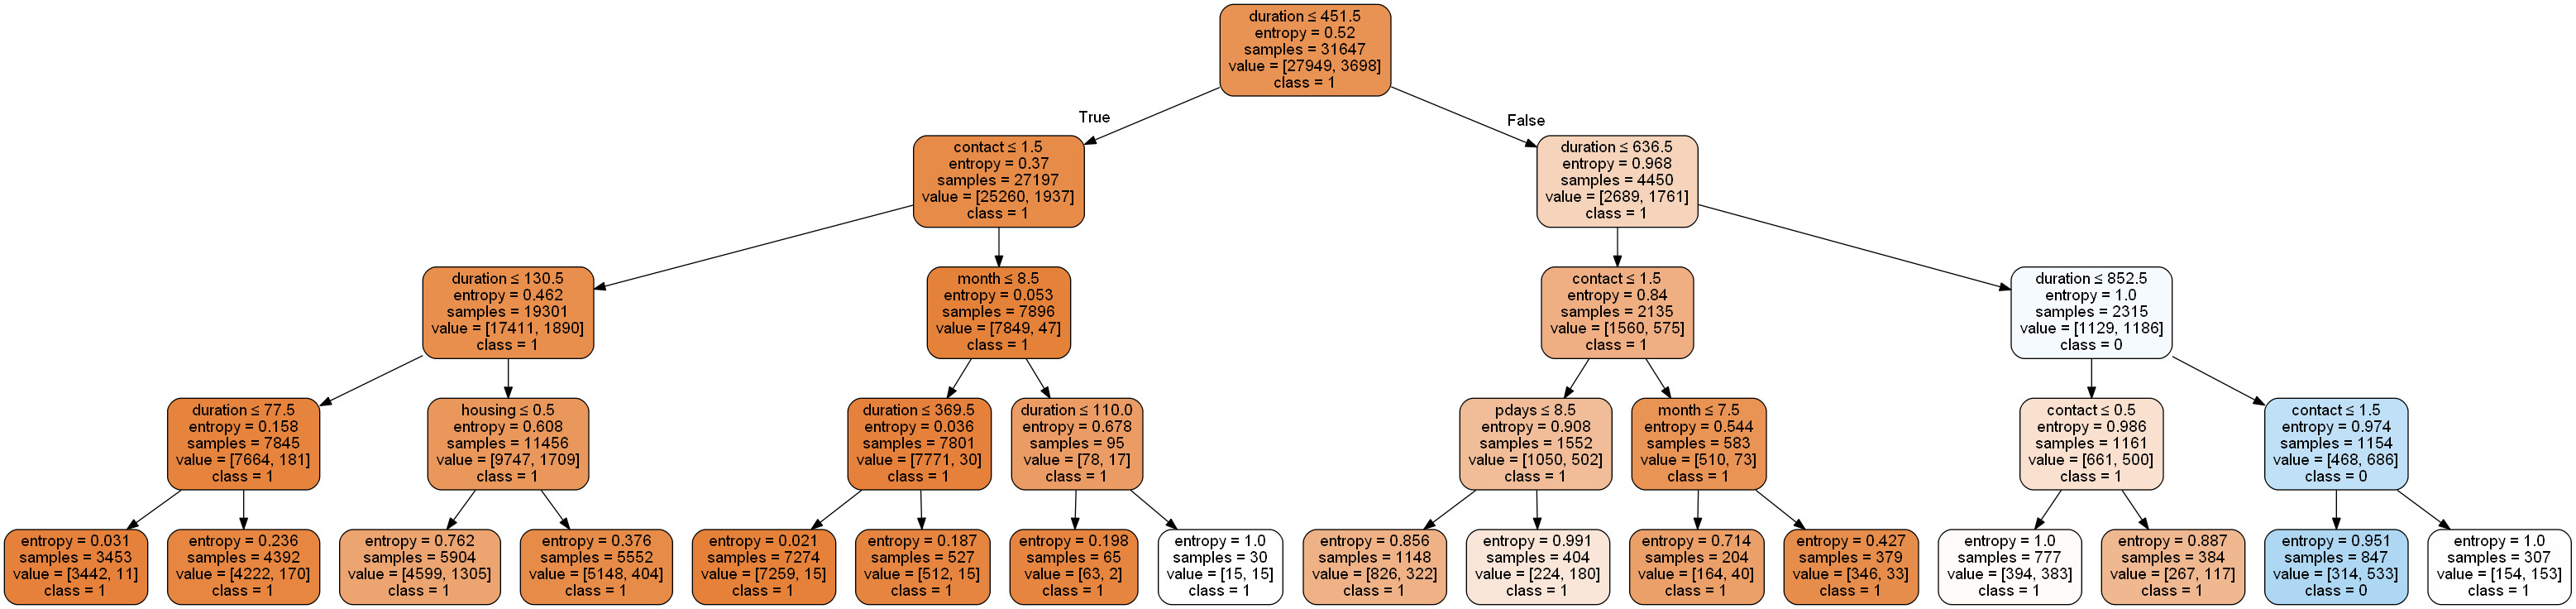

In [231]:
print('y_train Count:\n\n',y_train.value_counts())

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(bankDataDT_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bankDataDT_pruned.png')
Image(graph.create_png())

In [232]:
preds_train = bankDataDT_pruned.predict(X_train)
preds_test = bankDataDT_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

#### Decision Tree Model: Performance 

In [279]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted      0    1
Actual               
0          11824  149
1           1380  211

In [280]:
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11973
           1       0.59      0.13      0.22      1591

    accuracy                           0.89     13564
   macro avg       0.74      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564



ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA5AEA9D88>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002AA619CE988>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=None)

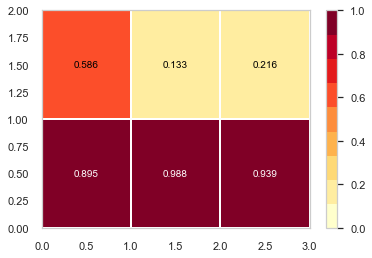

In [237]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA6E95EE08>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

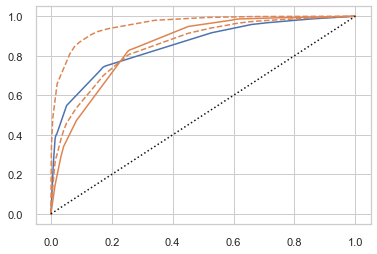

In [241]:
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

**Performance metrics**
1. **Precision:** Fraction of actuals per label that were correctly classified by the model
2. **Recall:** Fraction of predictions that were correctly classified by the model
3. **F1-score:** Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
4. **Support:** Number of occurrences of each class in y_test
5. **Accuracy:** Fraction of all observations that were correctly classified by the model
6. **Macro avg:** Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
7. **Micro/weighted avg:** Calculate metrics globally by counting the total true positives, false negatives and false positives
8. **AUC Score:** Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

In [246]:
bankData['ProbQuality_0'] = bankDataDT_pruned.predict_proba(bankData[features])[:,0]
bankData['ProbQuality_1'] = bankDataDT_pruned.predict_proba(bankData[features])[:,1]
bankData.head(10)

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  \
0    5      8       261         1     -1         0         3       0   
1    5      8       151         1     -1         0         3       0   
2    5      8        76         1     -1         0         3       0   
3    5      8        92         1     -1         0         3       0   
4    5      8       198         1     -1         0         3       0   
5    5      8       139         1     -1         0         3       0   
6    5      8       217         1     -1         0         3       0   
7    5      8       380         1     -1         0         3       0   
8    5      8        50         1     -1         0         3       0   
9    5      8        55         1     -1         0         3       0   

   ProbQuality_0  ProbQuality_1  
0           1.00           0.00  
1           1.00           0.00  
2           1.00           0.00  
3           1.00           0.00  
4           1.00           0.00  
5           1.00           0.00  
6           1.00           0.00  
7           0.97           0.03  
8           1.00           0.00  
9           1.00           0.00

#### Decision Tree Model: Feature Importance 

In [248]:
ftr_importance = bankDataDT_pruned.tree_.compute_feature_importances(normalize=False)
ftr_imp_dict = dict(zip(features, bankDataDT_pruned.feature_importances_))
ftr_imp = pd.DataFrame.from_dict(ftr_imp_dict, orient='index')
ftr_imp.sort_values(by=0, ascending=False)

0
duration  0.71
contact   0.19
housing   0.08
month     0.02
pdays     0.01
age       0.00
job       0.00
marital   0.00
education 0.00
default   0.00
balance   0.00
loan      0.00
day       0.00
campaign  0.00
previous  0.00
poutcome  0.00

**Insights from feature Importance:** It can be inferred that the Target Variable for the given Dataset is sensitive to duration, contact, housing, month and pdays

In [258]:
#Store the accuracy results for each model in a dataframe for final comparison
finalResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
finalResultsDf = finalResultsDf[['Method', 'accuracy']]
finalResultsDf

Method  accuracy
0  Decision Tree      0.89

## Classification_Model#2: Random Forest Model  

In [259]:
from sklearn.ensemble import RandomForestClassifier
randFrstcl = RandomForestClassifier(n_estimators = 50)
randFrstcl = randFrstcl.fit(X_train, y_train)
pred_randFrst = randFrstcl.predict(X_test)
acc_randFrst = accuracy_score(y_test, pred_randFrst)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_randFrst]})
finalResultsDf = pd.concat([finalResultsDf, tempResultsDf])
finalResultsDf = finalResultsDf[['Method', 'accuracy']]
finalResultsDf

Method  accuracy
0  Decision Tree      0.89
0  Random Forest      0.91

In [282]:
print(classification_report(y_test,pred_randFrst))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11973
           1       0.65      0.42      0.51      1591

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564



#### Random Forest: Performance Visualization

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA728E8108>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002AA72D6B948>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=None)

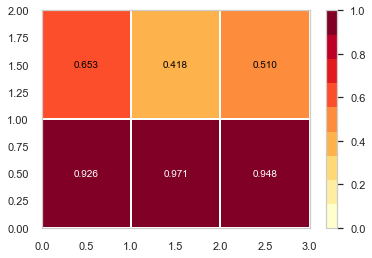

In [260]:
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA7120D4C8>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

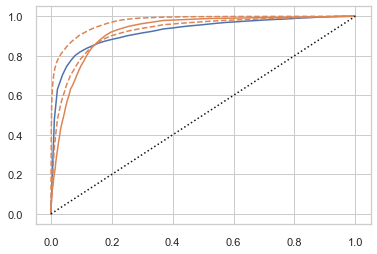

In [261]:
randFrst_roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
randFrst_roc.fit(X_train, y_train)
randFrst_roc.score(X_test, y_test)
randFrst_roc

**Insights from Random Forest Visualization:**
- Random Forest has better accuracy compared to Decision Tree 

## Classification_Model#3: Adaptive Boosting (AdaBoost) Model

In [265]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
adaBoostcl = adaBoostcl.fit(X_train, y_train)
pred_AdaBoost =adaBoostcl.predict(X_test)
acc_AdaBoost = accuracy_score(y_test, pred_AdaBoost)
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'accuracy': [acc_AdaBoost]})
finalResultsDf = pd.concat([finalResultsDf, tempResultsDf])
finalResultsDf = finalResultsDf[['Method', 'accuracy']]
finalResultsDf

Method  accuracy
0  Decision Tree      0.89
0  Random Forest      0.91
0       AdaBoost      0.89

In [283]:
print(classification_report(y_test,pred_AdaBoost))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11973
           1       0.58      0.17      0.26      1591

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



#### Adaptive Boosting Model: Performance Visualization

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA70D49D08>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002AA72A2F288>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=None)

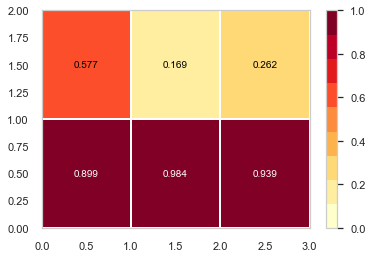

In [266]:
# Visualize model performance with yellowbrick library
viz_adaBoost = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz_adaBoost.fit(X_train, y_train)
viz_adaBoost.score(X_test, y_test)
viz_adaBoost

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA6B13E248>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

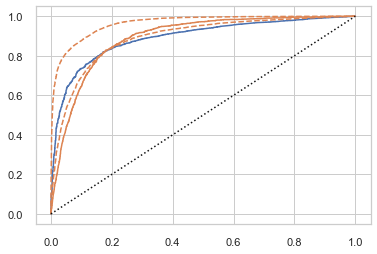

In [267]:
adaBoost_roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
adaBoost_roc.fit(X_train, y_train)
adaBoost_roc.score(X_test, y_test)
adaBoost_roc

**Insights from Adaptive Boosting Visualization:**
- Adaptive Boosting has similar accuracy compared to Decision Tree 

## Classification_Model#4: Bagging Model

In [269]:
from sklearn.ensemble import BaggingClassifier
bagg_cl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bagg_cl = bagg_cl.fit(X_train, y_train)
pred_Bagg = bagg_cl.predict(X_test)
acc_Bagg = accuracy_score(y_test, pred_Bagg)
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_Bagg]})
finalResultsDf = pd.concat([finalResultsDf, tempResultsDf])
finalResultsDf = finalResultsDf[['Method', 'accuracy']]
finalResultsDf

Method  accuracy
0  Decision Tree      0.89
0  Random Forest      0.91
0       AdaBoost      0.89
0        Bagging      0.90

In [284]:
print(classification_report(y_test,pred_Bagg))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11973
           1       0.62      0.46      0.53      1591

    accuracy                           0.90     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.89      0.90      0.90     13564



#### Bagging Model: Performance Visualization

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA6E3B3E08>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002AA6E3507C8>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=None)

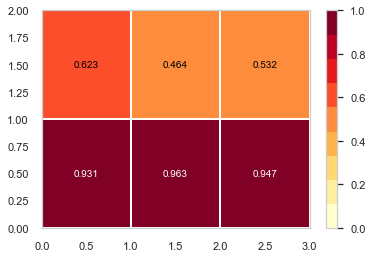

In [270]:
viz_bagg = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz_bagg.fit(X_train, y_train)
viz_bagg.score(X_test, y_test)
viz_bagg

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA5358CE88>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

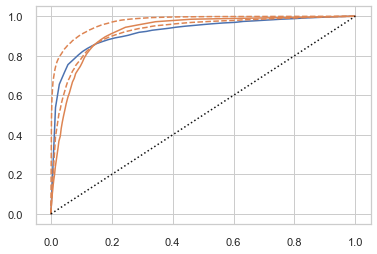

In [271]:
bagg_roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
bagg_roc.fit(X_train, y_train)
bagg_roc.score(X_test, y_test)
bagg_roc

**Insights from Bagging Visualization:**
- Bagging Model accuracy ranks between the Decision Tree and Random Forest models

## Classification_Model#5: Gradient Boost Model

In [272]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoostcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gradBoostcl = gradBoostcl.fit(X_train, y_train)
pred_GradBoost = gradBoostcl.predict(X_test)
acc_GradBoost = accuracy_score(y_test, pred_GradBoost)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GradBoost]})
finalResultsDf = pd.concat([finalResultsDf, tempResultsDf])
finalResultsDf = finalResultsDf[['Method', 'accuracy']]
finalResultsDf

Method  accuracy
0   Decision Tree      0.89
0   Random Forest      0.91
0        AdaBoost      0.89
0         Bagging      0.90
0  Gradient Boost      0.90

In [285]:
print(classification_report(y_test,pred_GradBoost))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11973
           1       0.64      0.33      0.43      1591

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



#### Gradient Boosting Model: Performance Visualization

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA5E68CF48>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002AA5E7C9648>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=None)

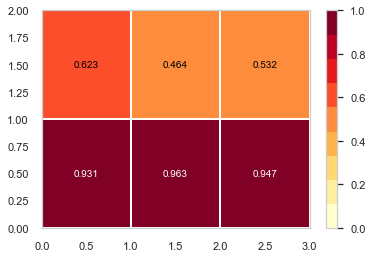

In [273]:
viz_gradBoost = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz_gradBoost.fit(X_train, y_train)
viz_gradBoost.score(X_test, y_test)
viz_gradBoost

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA5E1D2188>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

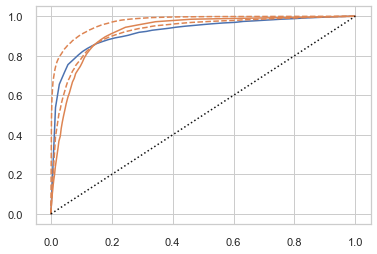

In [274]:
gradBoost_roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
gradBoost_roc.fit(X_train, y_train)
gradBoost_roc.score(X_test, y_test)
gradBoost_roc

**Insights from Gradient Boost Visualization:**
- Gradient Boost Model accuracy ranks between the Decision Tree and Random Forest models

## Conclusion on Best Classification Algorithm 

**Based on the Final Results Data Frame Provided Below Random Forest Seems to achieve the best accuracy when compared to all other calssification Models**

In [275]:
finalResultsDf

Method  accuracy
0   Decision Tree      0.89
0   Random Forest      0.91
0        AdaBoost      0.89
0         Bagging      0.90
0  Gradient Boost      0.90